In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

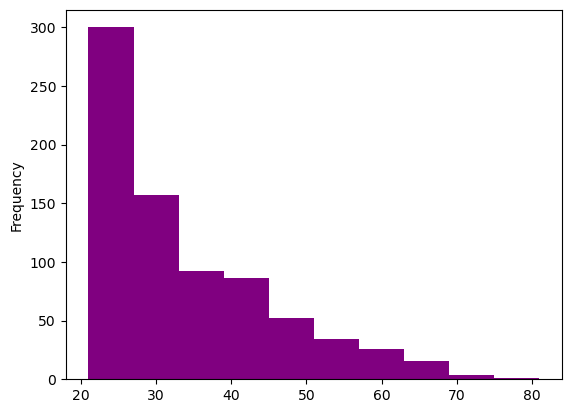

In [9]:
data.Age.plot(color='purple',kind='hist')
plt.show()

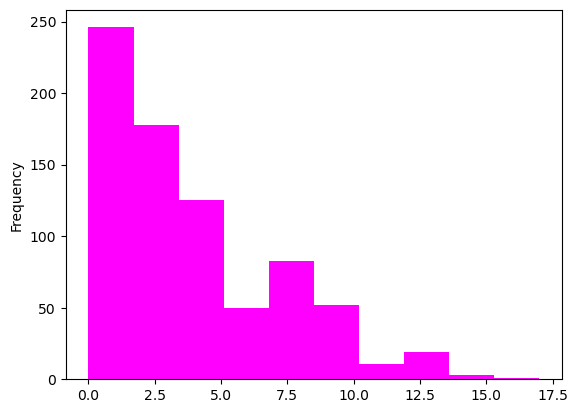

In [10]:
data.Pregnancies.plot(color='magenta',kind='hist')
plt.show()

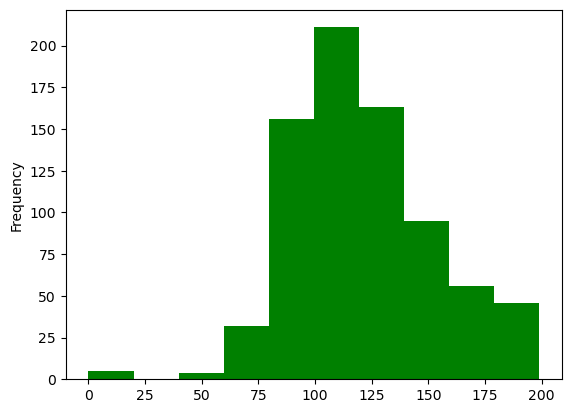

In [11]:
data.Glucose.plot(color='green',kind='hist')
plt.show()

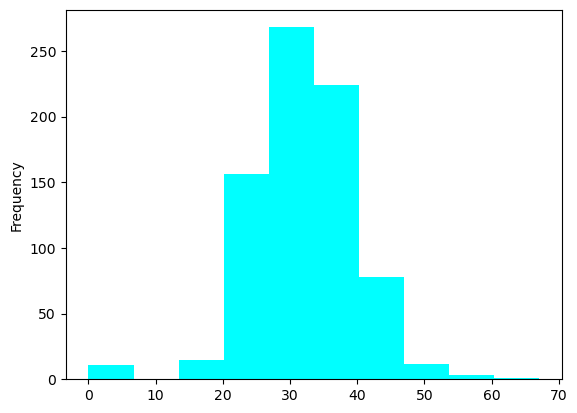

In [12]:
data.BMI.plot(color='cyan',kind='hist')
plt.show()

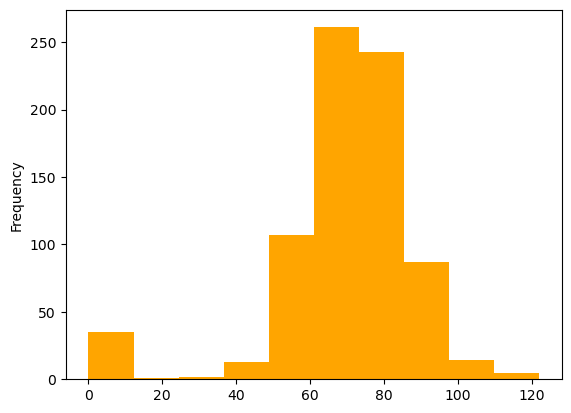

In [15]:
data.BloodPressure.plot(color='orange',kind='hist')
plt.show()

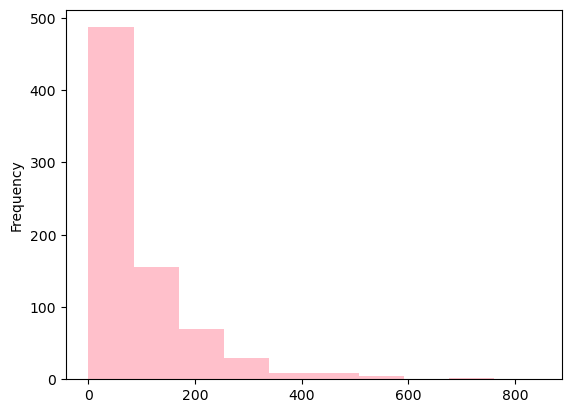

In [16]:
data.Insulin.plot(color='pink',kind='hist')
plt.show()

In [18]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

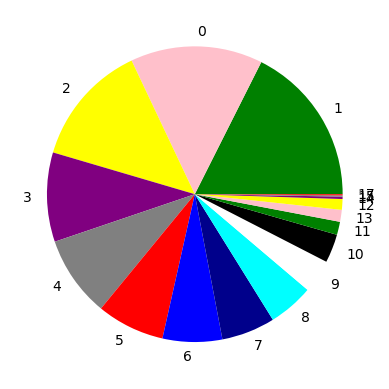

In [19]:
sizes=data.Pregnancies.value_counts().values
labels=data.Pregnancies.value_counts().index
colors=["green","pink","yellow","purple","grey","red","blue","darkblue","cyan","white","black"]
plt.pie(sizes,data=data,labels=labels,colors=colors)
plt.show()

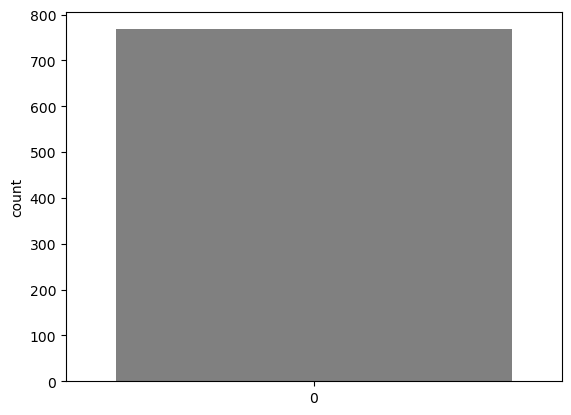

In [20]:
sns.countplot(data=data["Glucose"],color="gray")
plt.show()

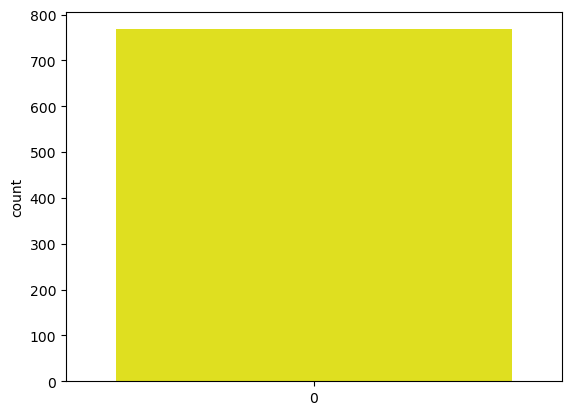

In [21]:
sns.countplot(data=data["Outcome"],color="yellow")
plt.show()

In [22]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

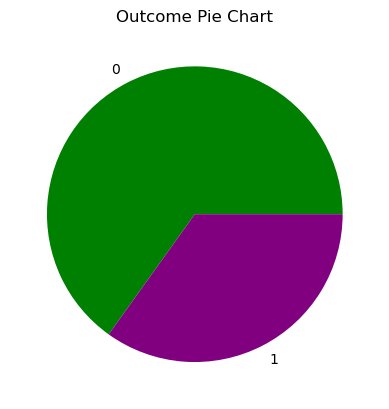

In [24]:
sizes=data.Outcome.value_counts().values
labels=data.Outcome.value_counts().index
colors=["green","purple"]
plt.pie(sizes,data=data,labels=labels,colors=colors)
plt.title('Outcome Pie Chart')
plt.show()

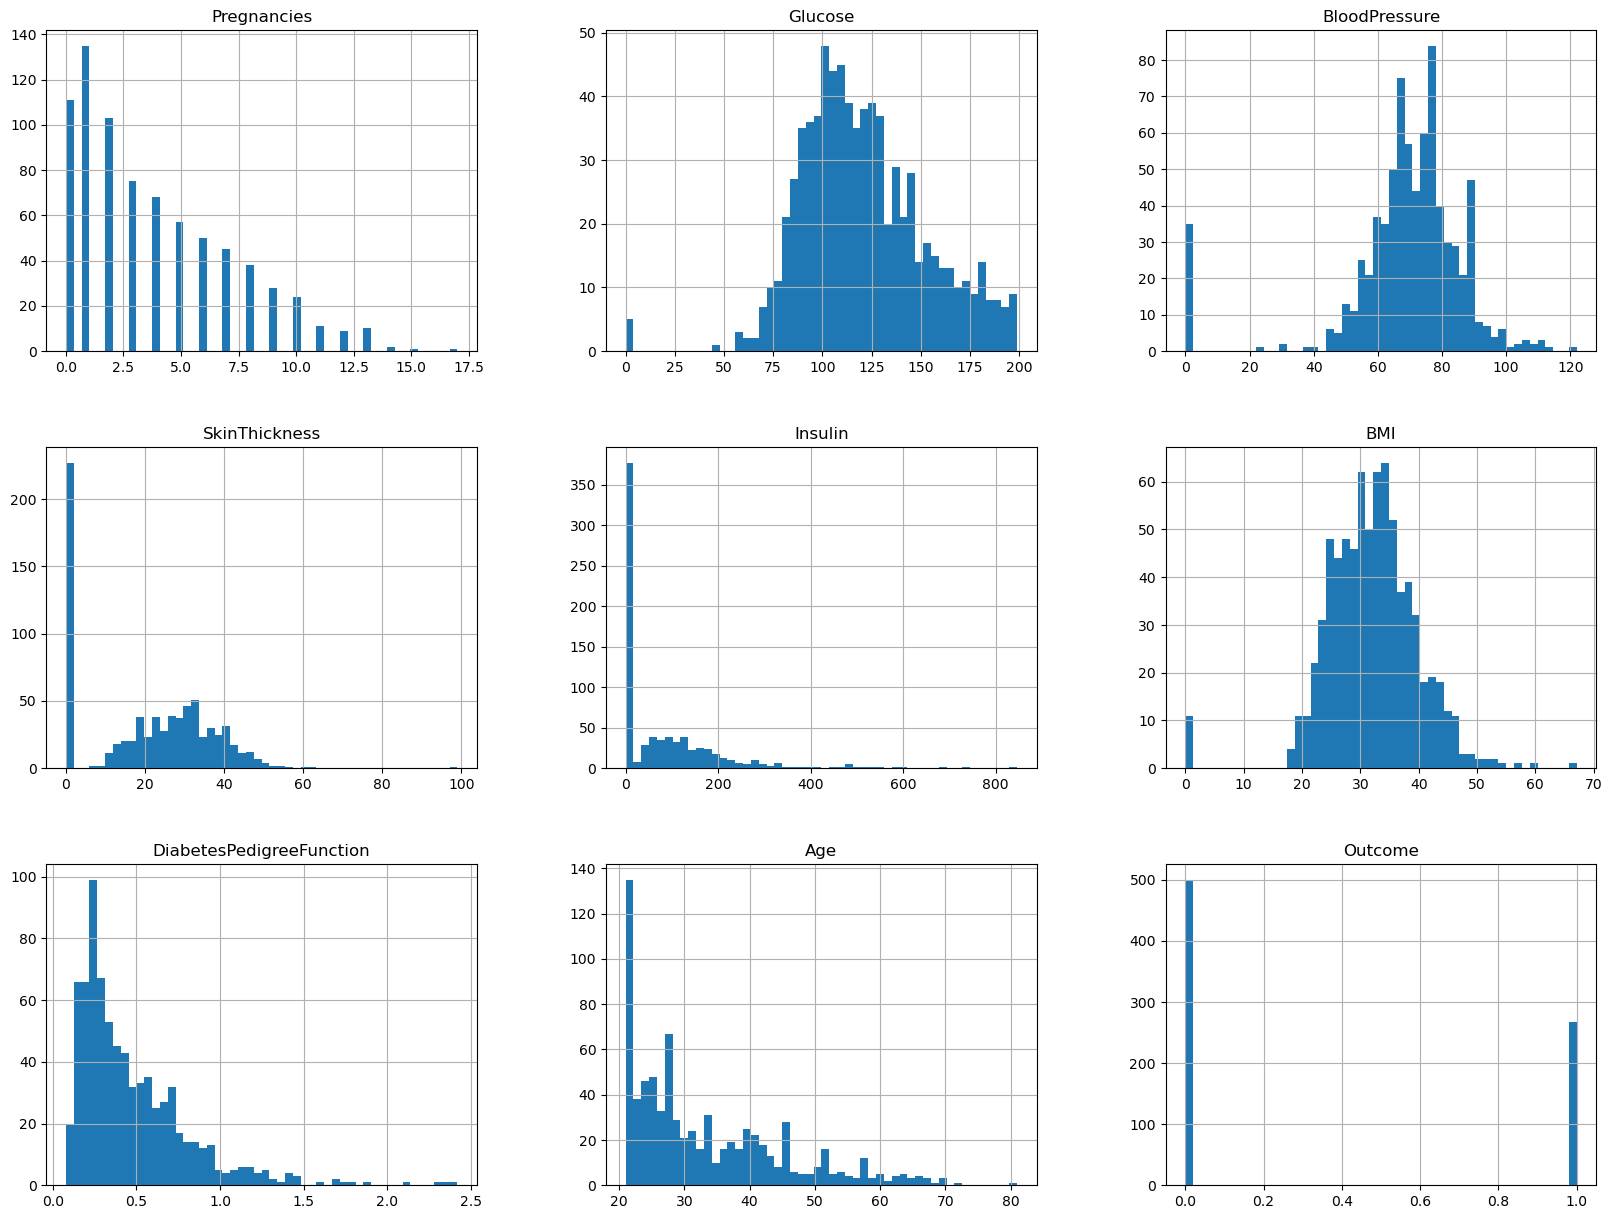

In [25]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [26]:
corr_matrix=data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [27]:
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
hm = sns.heatmap(data=data,
                annot=True)
plt.show()

In [31]:
train_df,test_df=train_test_split(data,test_size=0.25,random_state=42)
train_df_labels=train_df['Outcome'].copy()
train_df=train_df.drop('Outcome',axis=1)

In [32]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [33]:
num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])
train_prepared = num_pipeline.fit_transform(train_df)

Stochastic Gradient Descent (SGD)

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(train_prepared, train_df_labels)

SGDClassifier(random_state=42)

In [35]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,train_prepared, train_df_labels, cv=10, scoring='accuracy')

array([0.63793103, 0.79310345, 0.82758621, 0.74137931, 0.79310345,
       0.81034483, 0.68421053, 0.77192982, 0.75438596, 0.80701754])

In [36]:
prediction=sgd_clf.predict(train_prepared)
print("SGD Accuracy of Classifier: ", sgd_clf.score(train_prepared, train_df_labels))

SGD Accuracy of Classifier:  0.6267361111111112


Logistic Regression

In [37]:
model=LogisticRegression()
model.fit(train_prepared,train_df_labels)

LogisticRegression()

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,train_prepared, train_df_labels, cv=10, scoring='accuracy')

array([0.75862069, 0.84482759, 0.84482759, 0.70689655, 0.75862069,
       0.82758621, 0.71929825, 0.73684211, 0.80701754, 0.75438596])

In [40]:
prediction=model.predict(train_prepared)
print("LR Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

LR Accuracy of Classifier:  0.7795138888888888


Support Vector Machine (SVM)

In [45]:
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [46]:
poly_kernel_svm_clf=Pipeline([('scaler',StandardScaler()),
                              ('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))
                             ])

In [47]:
poly_kernel_svm_clf.fit(train_prepared,train_df_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [49]:
print('SVM Accuracy of Classifier: ',poly_kernel_svm_clf.score(train_prepared,train_df_labels))

SVM Accuracy of Classifier:  0.8559027777777778


In [52]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(poly_kernel_svm_clf,train_prepared,train_df_labels,cv=10)

In [53]:
cross_val_score(poly_kernel_svm_clf,train_prepared, train_df_labels, cv=10, scoring='accuracy')

array([0.74137931, 0.74137931, 0.81034483, 0.62068966, 0.74137931,
       0.67241379, 0.70175439, 0.78947368, 0.75438596, 0.77192982])

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_df_labels, y_train_pred)

array([[313,  64],
       [ 89, 110]], dtype=int64)

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision Score:',precision_score(train_df_labels, y_train_pred))
print('Recall Score:',recall_score(train_df_labels, y_train_pred))
print('F1 Score:',f1_score(train_df_labels, y_train_pred))

Precision Score: 0.632183908045977
Recall Score: 0.5527638190954773
F1 Score: 0.5898123324396782


In [56]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(train_df_labels,y_train_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


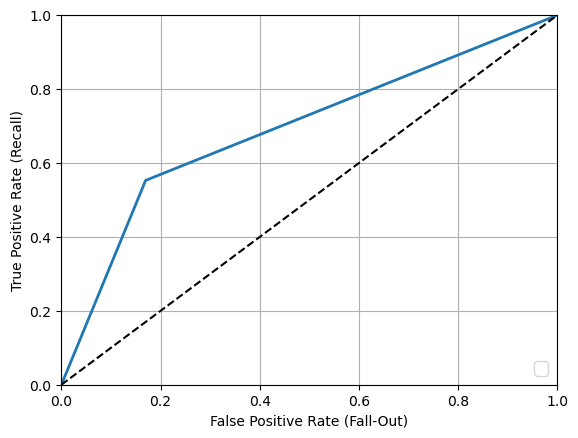

In [57]:
plt.plot(fpr, tpr, linewidth=2, label=None) 

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_df_labels,y_train_pred)

0.6915012729429642

Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(train_prepared,train_df_labels)

RandomForestClassifier(random_state=42)

In [60]:
y_probs_pred=cross_val_predict(forest_clf,train_prepared,train_df_labels,cv=10,method='predict_proba')

In [61]:
prediction=forest_clf.predict(train_prepared)
print('Random Forest Classifier Accuracy of Classifier: ',forest_clf.score(train_prepared,train_df_labels))

Random Forest Classifier Accuracy of Classifier:  1.0


In [62]:
cross_val_score(forest_clf,train_prepared, train_df_labels, cv=10, scoring='accuracy')

array([0.79310345, 0.81034483, 0.82758621, 0.70689655, 0.77586207,
       0.81034483, 0.78947368, 0.66666667, 0.8245614 , 0.77192982])

In [63]:
y_scores_forest=y_probs_pred[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(train_df_labels,y_scores_forest)

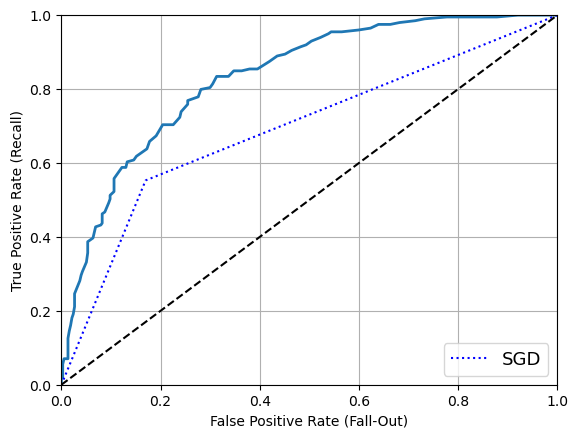

In [65]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=None)

plt.plot(fpr, tpr, "b:", label="SGD") 
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

In [66]:
roc_auc_score(train_df_labels,y_train_pred)

0.6915012729429642